Student Details

Name:Michel Danjou

ID:18263461

Etivity 4

All necessary imports are provided. Please do not add further imports.

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

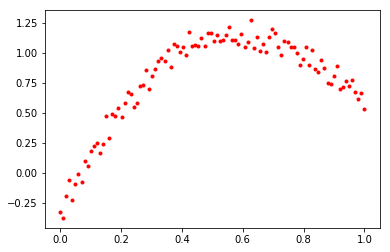

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]

lambdas = np.linspace(0,1,1000)
#lambdas = np.logspace(-10, 0, num=1000)  

X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Task 4.1 
  * Using the above code, find the optimum regularization parameter, l. 
    * In order to do so, you will need to decide on a suitable list of l values. 
    * Pick at most 1000 values! 
    * Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Correct results including plots. The chosen lambdas may not cover the range [0,1] appropriately and plots may not show very clear examples of over/underfitting.
  * Exemplary: Correct results, suitable range of <=1000 lambdas, plots clearly showing under+overfitting.

In [9]:
def plot_Eout_Ein_vs_lambda(lambda_min, lambda_max):
    # plot ein, eout for lambda > 0
    plt.plot(lambdas[:],ein[:], label='ein')
    plt.plot(lambdas[:],eout[:], label='eout')

    plt.xlim(lambda_min, lambda_max)

    plt.xlabel("lambdas")
    plt.ylabel("error")
    plt.legend(loc='best')
    plt.grid(True)
    plt.title("Ein and Eout for lambda >= 0")

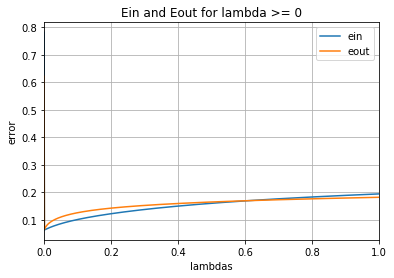

In [10]:
plot_Eout_Ein_vs_lambda(lambda_min=0, lambda_max=1)

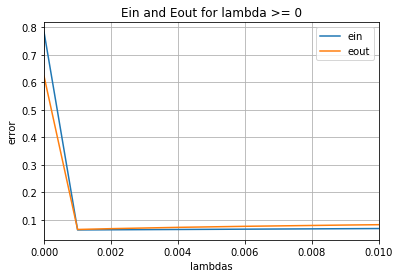

In [11]:
# Zoom in on the area where Eout is the smallest.
plot_Eout_Ein_vs_lambda(lambda_min=0, lambda_max=0.01)

### Observations:
The graph is showing both Ein and Eout. 

We can clearly see that:
  * Eout is high when lambda is 0, which corresponds to no regularization. 
  * Eout drops dramatically with a small value of lambda.
  * Both Eout and Ein start to increase as lambda grows.


In [12]:
lowest_eout_index = np.argmin(eout)
best_lambda = lambdas[lowest_eout_index]

print("lowest_eout_index          :", lowest_eout_index)
print("Best lambda used           :", best_lambda)
print("Eout without regularization:", eout[0])
print("Eout with regularization   :", eout[lowest_eout_index])
print("Difference                 :", eout[0] - eout[lowest_eout_index])

lowest_eout_index          : 1
Best lambda used           : 0.001001001001001001
Eout without regularization: 0.6221440953732322
Eout with regularization   : 0.06537745500567545
Difference                 : 0.5567666403675567


We notice a massive improvement for Eout after applying regularisation. I have ran this experiment multiple times and, although the results vary, we can see up to a 10 fold improvement on occasion.

# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

#### Rubric
See task 4.1 above

Text(0.5,1,'Eout by lambda (where lambda> 0)')

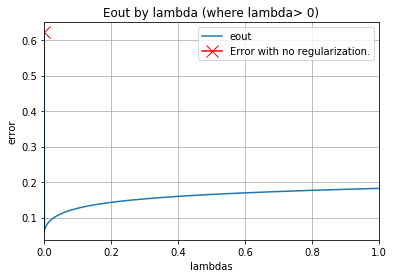

In [13]:
plt.plot(lambdas, eout, label='eout')
plt.plot(lambdas[0], eout[0], marker='x', color='red',  markersize=12, label="Error with no regularization.")
plt.xlim(0,1)
plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)

plt.title("Eout by lambda (where lambda> 0)")


#### Observations
We can see that Eout is very high when lambda is 0, which is expected as it means there is no regularisation. The value of Eout(lambda=0) is represented with a <span style="color:red">red cross </span> on the above graph which can be seen on the top left part of the plot.

We can see an important improvement of Eout as soon as lambda starts to grow over 0. 
Eout then slowly increases as lambda grows.


In [14]:
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


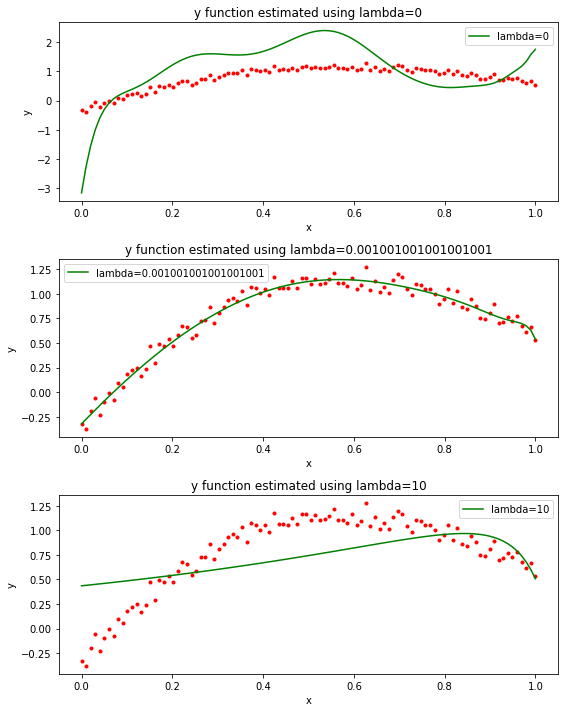

In [15]:
def experiment(l):

    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)

    weights = weights_reg(X_train,y_train,l)
    ein = calc_error(weights, X_train,y_train)
    eout = calc_error(weights, X_test,y_test)
    
    return ein, eout, weights


plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



In [16]:
print("best lambda: ", best_lambda)

best lambda:  0.001001001001001001


### Observations

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor. This is a case of over fitting.
  * for the optimum lambda, the polynomial estimates the target function very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function. This is a case of under fitting.


# Task 5
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 
  * Note that the data set provided is ordered by increasing X.
  
#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Full implementation of 10-fold CV yielding valid lambda and Eout.
  * Exemplary: Full implementation of 10-fold CV yielding valid lamda, Eout and plots of over/under/optimal fitting.  

#### Implementation inspired by "Learning from Data" by Prof. Yaser S. Abu-Mostafa, p149, and  a review of Chelliah Kanthanathan's code.

#### Algorithm implemented:

Iterate over a large selection of lambda values between 0 and 1. 

For each lambda:
  * perform K-Fold cross validation.
  * Calculate Eout.
  * Keep the average Eout
  
Once all the lambdas are processed:
  * Find the lowest Eout and its corresponding lambda. This is the best lambda.
  * Calculate K-Fold once more to find the weights associated with the best lambda.
  
Plot the curve using the weight associated with the best lambda.  

In [17]:
# For a given value of lambda (l), run KFold on the data set and calculate the mean Eout.

def get_eval(l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # mean Eval
    Eval = np.mean(eout)
    print("Lambda:{} Eval: {}".format(l, Eval))

    return Eval


In [18]:
# For each possible lambda, call get_eval(l) in order to retreive the mean Eout.

all_eval = []
for l in lambdas:
    my_eval = get_eval(l)
    all_eval.append(my_eval)

    
# Find the lowest Eval and its corresponding lambda
lowest_eout_index = np.argmin(all_eval)
best_lambda = lambdas[lowest_eout_index]
print("\nlowest_eout_index:{} best_lambda:{}".format(lowest_eout_index, best_lambda))

Lambda:0.0 Eval: 4.059577198258391
Lambda:0.001001001001001001 Eval: 0.0667681122467165
Lambda:0.002002002002002002 Eval: 0.06731975351192235
Lambda:0.003003003003003003 Eval: 0.06807552009593862
Lambda:0.004004004004004004 Eval: 0.06890514473113701
Lambda:0.005005005005005005 Eval: 0.0697454226871153
Lambda:0.006006006006006006 Eval: 0.07056655544788439
Lambda:0.007007007007007007 Eval: 0.07135597130832788
Lambda:0.008008008008008008 Eval: 0.07210976623860173
Lambda:0.009009009009009009 Eval: 0.07282825808670021
Lambda:0.01001001001001001 Eval: 0.07351369367156926
Lambda:0.011011011011011011 Eval: 0.07416907300060152
Lambda:0.012012012012012012 Eval: 0.07479755544151731
Lambda:0.013013013013013013 Eval: 0.07540217093297788
Lambda:0.014014014014014014 Eval: 0.07598569144763857
Lambda:0.015015015015015015 Eval: 0.07655058608030188
Lambda:0.016016016016016016 Eval: 0.0770990187995631
Lambda:0.017017017017017015 Eval: 0.07763286685029781
Lambda:0.018018018018018018 Eval: 0.078153748002899

Lambda:0.15615615615615616 Eval: 0.11861831518577219
Lambda:0.15715715715715717 Eval: 0.11881249664180563
Lambda:0.15815815815815815 Eval: 0.11900599792105752
Lambda:0.15915915915915915 Eval: 0.11919882571572224
Lambda:0.16016016016016016 Eval: 0.11939098658871186
Lambda:0.16116116116116116 Eval: 0.119582486976646
Lambda:0.16216216216216217 Eval: 0.11977333319279142
Lambda:0.16316316316316315 Eval: 0.11996353142992193
Lambda:0.16416416416416416 Eval: 0.12015308776311602
Lambda:0.16516516516516516 Eval: 0.1203420081524913
Lambda:0.16616616616616617 Eval: 0.12053029844587441
Lambda:0.16716716716716717 Eval: 0.12071796438141302
Lambda:0.16816816816816815 Eval: 0.12090501159012208
Lambda:0.16916916916916916 Eval: 0.12109144559836979
Lambda:0.17017017017017017 Eval: 0.12127727183031418
Lambda:0.17117117117117117 Eval: 0.12146249561027149
Lambda:0.17217217217217218 Eval: 0.1216471221650339
Lambda:0.17317317317317318 Eval: 0.12183115662613994
Lambda:0.17417417417417416 Eval: 0.122014604032075

Lambda:0.3203203203203203 Eval: 0.14411754296777418
Lambda:0.3213213213213213 Eval: 0.14424393380988193
Lambda:0.32232232232232233 Eval: 0.14437004990237284
Lambda:0.3233233233233233 Eval: 0.14449589221810819
Lambda:0.32432432432432434 Eval: 0.1446214617243314
Lambda:0.3253253253253253 Eval: 0.14474675938273554
Lambda:0.3263263263263263 Eval: 0.14487178614952498
Lambda:0.32732732732732733 Eval: 0.1449965429754872
Lambda:0.3283283283283283 Eval: 0.14512103080604646
Lambda:0.32932932932932935 Eval: 0.14524525058132962
Lambda:0.3303303303303303 Eval: 0.1453692032362259
Lambda:0.3313313313313313 Eval: 0.14549288970044558
Lambda:0.33233233233233234 Eval: 0.1456163108985756
Lambda:0.3333333333333333 Eval: 0.14573946775014213
Lambda:0.33433433433433435 Eval: 0.14586236116966025
Lambda:0.3353353353353353 Eval: 0.14598499206669355
Lambda:0.3363363363363363 Eval: 0.14610736134590077
Lambda:0.33733733733733734 Eval: 0.14622946990709754
Lambda:0.3383383383383383 Eval: 0.14635131864530232
Lambda:0.

Lambda:0.4774774774774775 Eval: 0.16110837959240615
Lambda:0.47847847847847846 Eval: 0.16120101282153504
Lambda:0.4794794794794795 Eval: 0.16129347925953724
Lambda:0.4804804804804805 Eval: 0.16138577939593277
Lambda:0.48148148148148145 Eval: 0.16147791371843387
Lambda:0.4824824824824825 Eval: 0.16156988271294837
Lambda:0.48348348348348347 Eval: 0.16166168686359592
Lambda:0.4844844844844845 Eval: 0.16175332665271164
Lambda:0.4854854854854855 Eval: 0.1618448025608536
Lambda:0.48648648648648646 Eval: 0.16193611506681566
Lambda:0.4874874874874875 Eval: 0.16202726464763043
Lambda:0.48848848848848847 Eval: 0.16211825177858147
Lambda:0.4894894894894895 Eval: 0.16220907693320816
Lambda:0.4904904904904905 Eval: 0.16229974058331528
Lambda:0.49149149149149146 Eval: 0.16239024319898265
Lambda:0.4924924924924925 Eval: 0.1624805852485697
Lambda:0.4934934934934935 Eval: 0.16257076719872438
Lambda:0.4944944944944945 Eval: 0.16266078951439272
Lambda:0.4954954954954955 Eval: 0.16275065265882363
Lambda:0

Lambda:0.6396396396396397 Eval: 0.17423659206132985
Lambda:0.6406406406406406 Eval: 0.1743075241327186
Lambda:0.6416416416416416 Eval: 0.174378349783508
Lambda:0.6426426426426426 Eval: 0.17444906929168222
Lambda:0.6436436436436437 Eval: 0.1745196829343018
Lambda:0.6446446446446447 Eval: 0.174590190987507
Lambda:0.6456456456456456 Eval: 0.17466059372652504
Lambda:0.6466466466466466 Eval: 0.17473089142566495
Lambda:0.6476476476476476 Eval: 0.17480108435832992
Lambda:0.6486486486486487 Eval: 0.1748711727970165
Lambda:0.6496496496496497 Eval: 0.17494115701331864
Lambda:0.6506506506506506 Eval: 0.1750110372779327
Lambda:0.6516516516516516 Eval: 0.17508081386065696
Lambda:0.6526526526526526 Eval: 0.17515048703039998
Lambda:0.6536536536536537 Eval: 0.17522005705518157
Lambda:0.6546546546546547 Eval: 0.175289524202134
Lambda:0.6556556556556556 Eval: 0.17535888873751185
Lambda:0.6566566566566566 Eval: 0.17542815092668645
Lambda:0.6576576576576576 Eval: 0.17549731103415817
Lambda:0.6586586586586

Lambda:0.8268268268268268 Eval: 0.18590836321581578
Lambda:0.8278278278278278 Eval: 0.18596338982310345
Lambda:0.8288288288288288 Eval: 0.18601834910096637
Lambda:0.8298298298298298 Eval: 0.1860732412030772
Lambda:0.8308308308308309 Eval: 0.18612806628264522
Lambda:0.8318318318318318 Eval: 0.18618282449241993
Lambda:0.8328328328328328 Eval: 0.18623751598469132
Lambda:0.8338338338338338 Eval: 0.18629214091129084
Lambda:0.8348348348348348 Eval: 0.18634669942359472
Lambda:0.8358358358358359 Eval: 0.18640119167252434
Lambda:0.8368368368368369 Eval: 0.18645561780854894
Lambda:0.8378378378378378 Eval: 0.1865099779816845
Lambda:0.8388388388388388 Eval: 0.18656427234149947
Lambda:0.8398398398398398 Eval: 0.18661850103711342
Lambda:0.8408408408408409 Eval: 0.18667266421719936
Lambda:0.8418418418418419 Eval: 0.1867267620299843
Lambda:0.8428428428428428 Eval: 0.1867807946232547
Lambda:0.8438438438438438 Eval: 0.18683476214435207
Lambda:0.8448448448448448 Eval: 0.1868886647401798
Lambda:0.84584584

Lambda:0.996996996996997 Eval: 0.19440542796573868
Lambda:0.997997997997998 Eval: 0.19445089246513306
Lambda:0.998998998998999 Eval: 0.19449631024079736
Lambda:1.0 Eval: 0.1945416813868691

lowest_eout_index:1 best_lambda:0.001001001001001001


In [19]:
# Return the weights corresponding to the lowest Eout generated with Kfold.
def get_weights_for_eout(l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # Validation. Find the lowest Eout and best lambda
    lowest_eout_index = np.argmin(eout)
    best_lambda = lambdas[lowest_eout_index]

    return weights[lowest_eout_index]


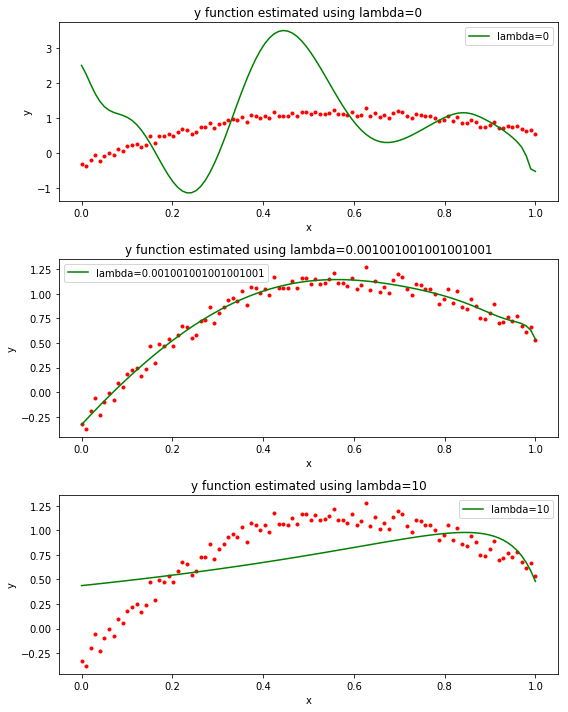

In [20]:
# Plot overfit, best approximation and underfit curves.

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
best_weights = []

for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    weights = get_weights_for_eout(ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

    # keep the weights for 'best_lambda' so that we can analyse them later on.
    if(i==2):
        best_weights = weights
        
plt.show()


In [21]:
print("best_weights:", best_weights)

best_weights: [-3.30527409e-01  4.97958304e+00 -3.07607696e+00 -2.26142431e+00
 -3.65919707e-01  7.11117052e-01  9.75110275e-01  7.82977480e-01
  4.27595964e-01  7.84949985e-02 -1.88979325e-01 -3.55702457e-01
 -4.30768763e-01 -4.34393482e-01 -3.88697530e-01 -3.13379257e-01
 -2.24137733e-01 -1.32510606e-01 -4.63524421e-02  2.94660262e-02
  9.23482187e-02  1.41344878e-01  1.76641071e-01  1.99157168e-01
  2.10250417e-01  2.11499387e-01  2.04553626e-01  1.91032979e-01
  1.72463688e-01  1.50241045e-01  1.25610764e-01  9.96631396e-02
  7.33356620e-02  4.74209305e-02  2.25776477e-02 -6.56855665e-04
 -2.18536109e-02 -4.06792000e-02 -5.68835689e-02 -7.02887133e-02
 -8.07783571e-02 -8.82886650e-02 -9.27999716e-02 -9.43294813e-02
 -9.29248695e-02 -8.86587077e-02 -8.16236339e-02 -7.19281874e-02
 -5.96932335e-02 -4.50489083e-02 -2.81320188e-02]


In [22]:
print("best_lambda:{}".format(best_lambda))

best_lambda:0.001001001001001001


### Observations

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor.
  * for the optimum lambda, the polynomial estimates the target function trend very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function.


### Possible algorithm improvements

#### Combine multiple functions
`get_eval()` and `get_weights_for_eout()` share a lot of code in common and could be refactored into a single function.

#### Hold back data

We should **hold back** a portion of the data set and use it to only **evaluate the final model**, which would provide an **unbiased evaluation of Eout**.  

So in terms of algorithm we should consider doing this: 

  * Split the data set between training set  and testing set (80/20 rule) 
  * Run the KFold on the training set to find the best lambda 
  * Once we have the best lambda and associated weights, we calculate Eout on the testing set that we had saved at step 1. 

More information regarding holding out a portion of the data set for evaluating the final model: https://machinelearningmastery.com/difference-test-validation-datasets/

# Task 6 (CE6002)
  * Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

  * Observe the resulting Eout, and l compare these to previous results. 
    * What do you see? 
    * Is this what you expected?
  * Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

#### Rubric
  * Beginning: Incorrect use of LassoCV and Ridge CV.
  * Developing: Incorrect use of LassCV or RidgeCV.
  * Accomplished: LassoCV and RidgeCV used correctly. Valid commentary on difference in lambda obtained in Task 1,2.
  * Exemplary: Correct use of Lasso&RidgeCV. Valid commentary on lambda including insights in the differences with Task 1,2 relating to the ability to approximate Eout correctly.

References: 
  * https://scikit-learn.org/stable/auto_examples/cluster/plot_feature_agglomeration_vs_univariate_selection.html#sphx-glr-auto-examples-cluster-plot-feature-agglomeration-vs-univariate-selection-py
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
  * https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b 
    * Describes how RidgeVC and LassoCV perform better at reducting over-fitting compared to simple Linear regression. 

What is the difference between Ridge and RidgeCV?
  * https://stats.stackexchange.com/questions/262640/the-results-of-cv-on-ridge-are-different-than-the-results-of-ridgecv

In [23]:
def alternate_regression(title, clf):
    score = clf.score(X_trans, y) 
    pred = clf.predict(X_trans)
    params = clf.get_params
    lambdas = clf.alpha_ 
    coeffs = clf.coef_

    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = title
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print("score  :", score)
    print("params :", params)
    print("lambdas:", lambdas)
    print("coefs  :", coeffs)

## Ridge

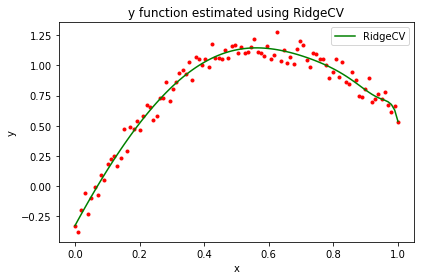

score  : 0.9742595730831578
params : <bound method BaseEstimator.get_params of RidgeCV(alphas=array([0.001, 0.002, ..., 0.999, 1.   ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)>
lambdas: 0.001001001001001001
coefs  : [ 0.00000000e+00  4.91751024e+00 -2.94240323e+00 -2.25004143e+00
 -4.58558952e-01  6.27097308e-01  9.45349344e-01  8.02070867e-01
  4.72867174e-01  1.28416549e-01 -1.48648308e-01 -3.31711310e-01
 -4.24229359e-01 -4.42914835e-01 -4.08150310e-01 -3.39146463e-01
 -2.51902325e-01 -1.58686352e-01 -6.82641060e-02  1.35656377e-02
  8.33585622e-02  1.39448805e-01  1.81455549e-01  2.09883757e-01
  2.25813802e-01  2.30667884e-01  2.26039291e-01  2.13571308e-01
  1.94874277e-01  1.71471340e-01  1.44765323e-01  1.16020870e-01
  8.63573548e-02  5.67492023e-02  2.80311213e-02  9.06435795e-04
 -2.40427985e-02 -4.63448159e-02 -6.56269421e-02 -8.16046069e-02
 -9.40708475e-02 -1.02886474e-01 -1.07970986e-01 -1.09294285e-01
 -1

In [24]:
clf = RidgeCV(alphas=lambdas[1:]).fit(X_trans, y)

alternate_regression("RidgeCV", clf)

## Lasso

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


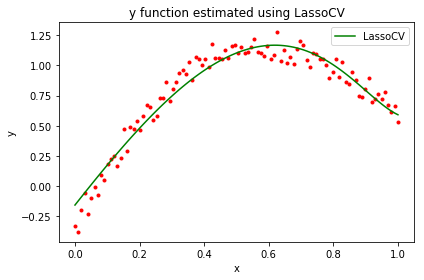

score  : 0.9513102198259137
params : <bound method BaseEstimator.get_params of LassoCV(alphas=array([0.   , 0.001, ..., 0.999, 1.   ]), copy_X=True, cv=10,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=0,
    selection='cyclic', tol=0.0001, verbose=False)>
lambdas: 0.001001001001001001
coefs  : [ 0.          3.38758397 -0.5633176  -2.35356588 -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.05740849  0.2093543   0.01007509  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


In [25]:
clf = LassoCV(alphas=lambdas, cv=10, random_state=0).fit(X_trans, y)

alternate_regression("LassoCV", clf)

## Analysis

Reference: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Lasso and Ridge are 2 different regularisers:

##### Ridge:
Ridge performs L2 regularization which adds a penalty equivalent to square of the magnitude of coefficients. L2 regularization has the effect of shrinking the weights which helps to reduce the model complexity. This can be clearly seen by the output of the coef_ parameters.

Ridge selected the following optimum lambda: **0.001001001001001001**.

##### Lasso:
Performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
Lasso pushes a large number of weights to zero which results in simpler models. This can be clearly seen by the output of the coef_ parameters.

Lasso found the following optimum lambda: **0.001001001001001001**.

#### Ridge & Lasso compared to our own implementation
Here is what we notice when comparing the 3 regularization approaches:
  * The weights generated by our own algorithm are similar in value to the ones generated by Ridge's.
  * Ridge, Lasso, and our own algorithm, generally find **different values for lambda**, but on occasion, like here, they are **identical**.
  * Lambda is generally very small.

